In [1]:
import pandas as pd
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


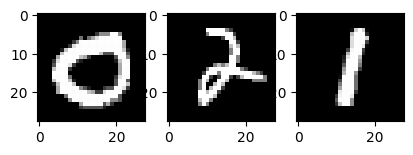

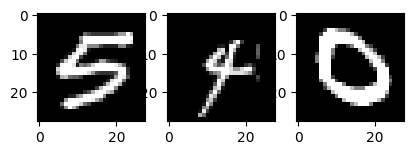

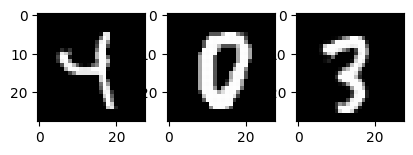

In [2]:
import matplotlib.pyplot as plt
import random

for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()


In [3]:
x_train_new = x_train.reshape(-1, 28, 28, 1)
x_test_new = x_test.reshape(-1, 28, 28, 1)

x_train_ = x_train_new / 255.0
x_test_ = x_test_new / 255.0

In [4]:
x_train_new.shape, x_test_new.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from keras.utils import to_categorical

In [6]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [7]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
model.fit(x_train_, y_train_new, validation_data=(x_test_, y_test_new), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1193 - accuracy: 0.9630 - val_loss: 0.0434 - val_accuracy: 0.9840
Epoch 2/15
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0397 - val_accuracy: 0.9861
Epoch 3/15
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 4/15
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0261 - val_accuracy: 0.9901
Epoch 5/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 6/15
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 7/15
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0333 -

In [22]:
y_pred = model.predict(x_test_)
y_pred

313/313 [==============================] - 3s 10ms/step


array([[3.86939498e-18, 5.23226254e-12, 7.57153617e-13, ...,
        9.99999940e-01, 2.99175277e-15, 1.11715484e-10],
       [4.52461665e-15, 1.05951350e-11, 9.99999940e-01, ...,
        4.49426414e-26, 2.51926236e-21, 4.29519867e-35],
       [1.98049435e-21, 9.99999940e-01, 3.45188690e-17, ...,
        2.10667907e-16, 1.61043105e-14, 2.34006790e-18],
       ...,
       [4.63857623e-32, 1.03459574e-17, 5.04331998e-23, ...,
        5.09903312e-23, 4.51231548e-20, 3.21565312e-21],
       [1.40378276e-26, 1.96756085e-25, 6.46165906e-31, ...,
        1.06251557e-28, 1.05749055e-11, 1.65524560e-20],
       [5.51719410e-17, 1.41476061e-18, 1.13451942e-15, ...,
        4.09837666e-30, 3.72229492e-19, 6.72848067e-22]], dtype=float32)

In [23]:
import numpy as np

In [24]:
t = []

for i in range(len(y_pred)):
    t.append(np.argmax(y_pred[i]))

t

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 1,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [25]:
accuracy_score(y_test, t)

0.9904

In [26]:
y_pred

array([[3.86939498e-18, 5.23226254e-12, 7.57153617e-13, ...,
        9.99999940e-01, 2.99175277e-15, 1.11715484e-10],
       [4.52461665e-15, 1.05951350e-11, 9.99999940e-01, ...,
        4.49426414e-26, 2.51926236e-21, 4.29519867e-35],
       [1.98049435e-21, 9.99999940e-01, 3.45188690e-17, ...,
        2.10667907e-16, 1.61043105e-14, 2.34006790e-18],
       ...,
       [4.63857623e-32, 1.03459574e-17, 5.04331998e-23, ...,
        5.09903312e-23, 4.51231548e-20, 3.21565312e-21],
       [1.40378276e-26, 1.96756085e-25, 6.46165906e-31, ...,
        1.06251557e-28, 1.05749055e-11, 1.65524560e-20],
       [5.51719410e-17, 1.41476061e-18, 1.13451942e-15, ...,
        4.09837666e-30, 3.72229492e-19, 6.72848067e-22]], dtype=float32)

In [27]:
y_pred[0]

array([3.86939498e-18, 5.23226254e-12, 7.57153617e-13, 7.40825112e-14,
       6.66840187e-16, 6.92071154e-19, 1.56856577e-21, 9.99999940e-01,
       2.99175277e-15, 1.11715484e-10], dtype=float32)

In [21]:
y_test[0]

7